# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df = df.drop('State', axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
l = LabelEncoder()
df['International plan'] = l.fit_transform(df['International plan'])
df['Voice mail plan'] = l.fit_transform(df['Voice mail plan'])
df['Churn'] = l.fit_transform(df['Churn'])

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [5]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

*В датасете остались только числовые значения*

In [7]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Account length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
Area code,3333.000000,437.182418,42.371290,408.000000,408.000000,415.000000,510.000000,510.000000
International plan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
Voice mail plan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
Number vmail messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
Total day minutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
Total day calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
Total day charge,3333.000000,30.562307,9.259435,0.000000,24.430000,30.500000,36.790000,59.640000
Total eve minutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
Total eve calls,3333.000000,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000


In [8]:
df.duplicated().sum()

np.int64(0)

*Дубликатов, пропущенных значений - нет*

Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [9]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

Проверьте баланс классов. Является ли выборка сбалансированной?

In [10]:
df['Churn'].value_counts(sort = False)

Churn
0    2850
1     483
Name: count, dtype: int64

*По целевому показателю выборка не сбалансированная - данных с меньшим классом (положительное значение Churn) в 5,9 раз меньше, чем с отрицательным значением Churn*

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Churn)')

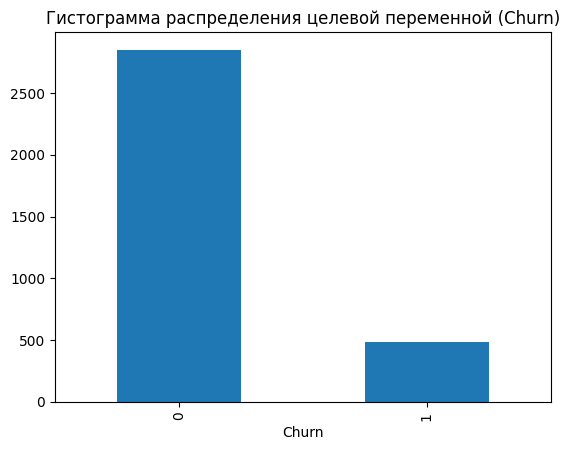

In [21]:
df['Churn'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Churn)')

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [27]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics
import seaborn as sns

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


**Модель логистической регрессии:**

In [30]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.21      0.30       143

    accuracy                           0.86      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000



In [31]:
confusion_mat = confusion_matrix(y_test, y_pred1)
print("Точность:", accuracy_score(y_test, y_pred1))
print("Точность:", precision_score(y_test, y_pred1, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred1, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred1, average = 'binary'))


Точность: 0.862
Точность: 0.5454545454545454
Полнота: 0.2097902097902098
F1-мера: 0.30303030303030304


*Показатель Precision на уровне 0.54, показатель Recall 0.196 - крайне низкие параметры классификации, модель работает плохо.*

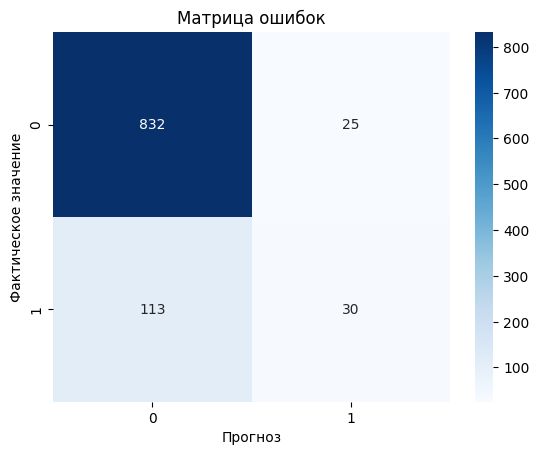

In [32]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Модель не склонна прогнозировать объекты со сзначением Churn = 1, практически все объекты относит к Churn=0*

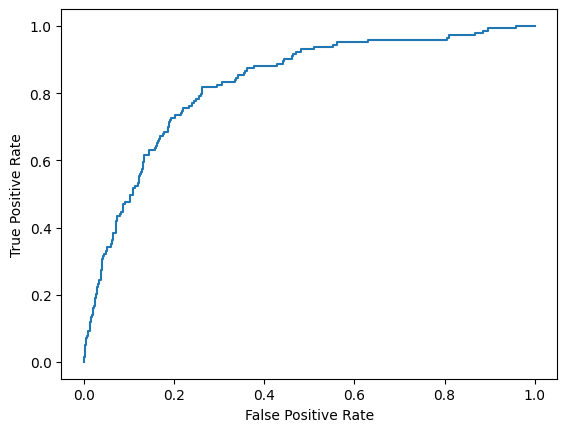

In [33]:
#Предсказываем вероятности
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
print("AUC: %.3f" % auc)

AUC: 0.828


In [40]:
!pip install plotly

  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached narwhals-1.30.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)
Using cached narwhals-1.30.0-py3-none-any.whl (313 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 83,2%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания). Однако мы помним, что в наших данных есть очень существенный дисбаланс классов по целевому признаку, поэтому значение показателя AUC на уровне 83,2% демонстрирует лишь нежелание модели правильно классифицировать объекты в меньший по численности класс, модель по-сути бесполезна, так как относит все объекты преимущественно к мажорному классу (предсказывает на всех данных отсуствие перехода к другому оператору). Основной в данном случае показатель - Recall - доля правильно предсказанный показаний, для Churn=True (клиент уходит) она составляет лишь 21%. То есть модель правильно предсказала 21% ушедших клиентов, что крайне мало.*

**Метод опорных векторов**

In [41]:
model2 = SVC(kernel='linear', probability=True)
#Включаем вероятности в параметрах модели, чтобы построить ROC AUC, ограничиваем число итераций

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



c:\Users\rukavishnikovav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rukavishnikovav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rukavishnikovav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

*Показатель Precision на уровне 1, но показатель Recall 0.00 - крайне низкие параметры классификации, модель работает плохо.*

In [43]:
confusion_mat = confusion_matrix(y_test, y_pred2)
print("Точность:", accuracy_score(y_test, y_pred2))
print("Точность:", precision_score(y_test, y_pred2, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred2, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred2, average = 'binary'))


Точность: 0.857
Точность: 0.0
Полнота: 0.0
F1-мера: 0.0


c:\Users\rukavishnikovav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



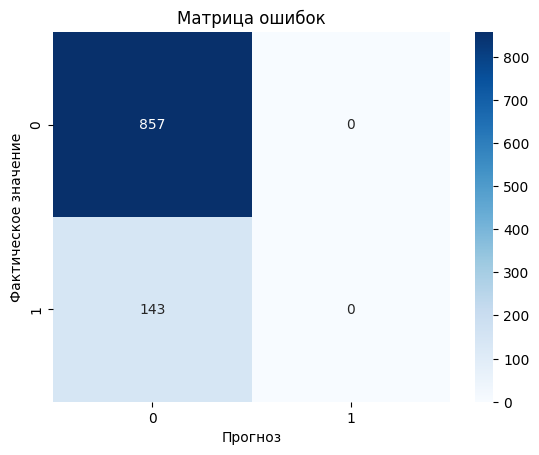

In [44]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Еще очевиднее нежелание модели классифицировать объекты в область Churn=1, все объекты классифицируются в область Churn=0 (отсутствие перехода)*

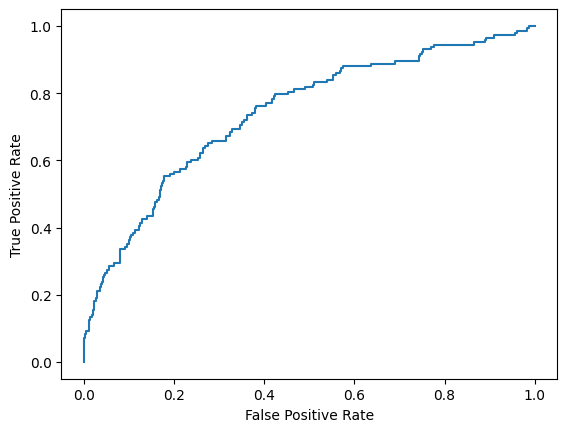

In [45]:
#Предсказываем вероятности
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
print("AUC: %.3f" % auc)

AUC: 0.740


In [47]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Значение показателя AUC на уровне 81,4%, и еще сильнее, чем в модели логистической регрессии, модель демонстрирует нежелание правильно классифицировать объекты в меньший по численности класс, модель по-сути бесполезна, так как относит все объекты преимущественно к мажорному классу (предсказывает на всех данных отсуствие перехода к другому оператору). Основной в данном случае показатель - Recall - доля правильно предсказанный показаний, для Churn=True (клиент уходит) она составляет лишь 1%. То есть модель правильно предсказала 1% ушедших клиентов, что крайне мало. Из 143 случае перехода на тестовой выборке модель правильно предсказала лишь 2.*

**Модель Решающих деревьев**

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [48]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.89      0.71      0.79       143

    accuracy                           0.95      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.95      0.95      0.94      1000



In [49]:
confusion_mat = confusion_matrix(y_test, y_pred3)
print("Точность:", accuracy_score(y_test, y_pred3))
print("Точность:", precision_score(y_test, y_pred3, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred3, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred3, average = 'binary'))


Точность: 0.947
Точность: 0.8947368421052632
Полнота: 0.7132867132867133
F1-мера: 0.7937743190661478


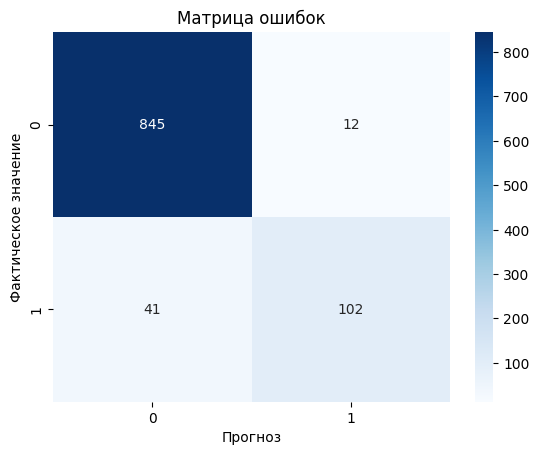

In [50]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*В модели решающих деревьев мы наблюдаем более уверенное желание модели классифицировать объекты в минорный класс (Churn=True) - из 143 случаев перехода к другому оператору модель верно определила 102.*

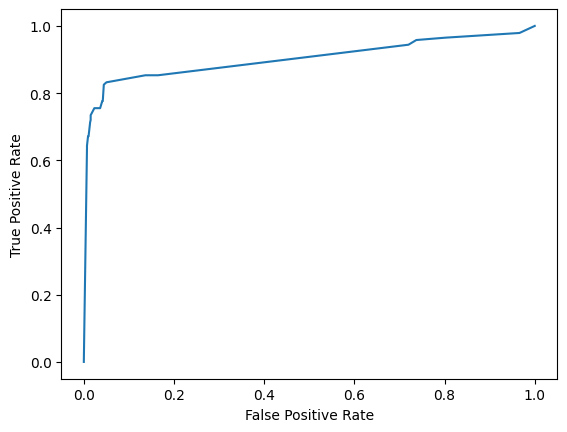

In [51]:
#Предсказываем вероятности
y_pred_proba3 = model3.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba3)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [52]:
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
print("AUC: %.3f" % auc)

AUC: 0.902


In [53]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Значение показателя AUC выросло по сравнению с предыдущими моделями несущественно, но модель стала лучше, что видно по показателю Recall для минорного класса, который увеличился с 21% до 71%. Более 2/3 переходов модель находит и классифицирует верно.*

*Визуализируем дерево*

In [54]:
from sklearn.tree import plot_tree

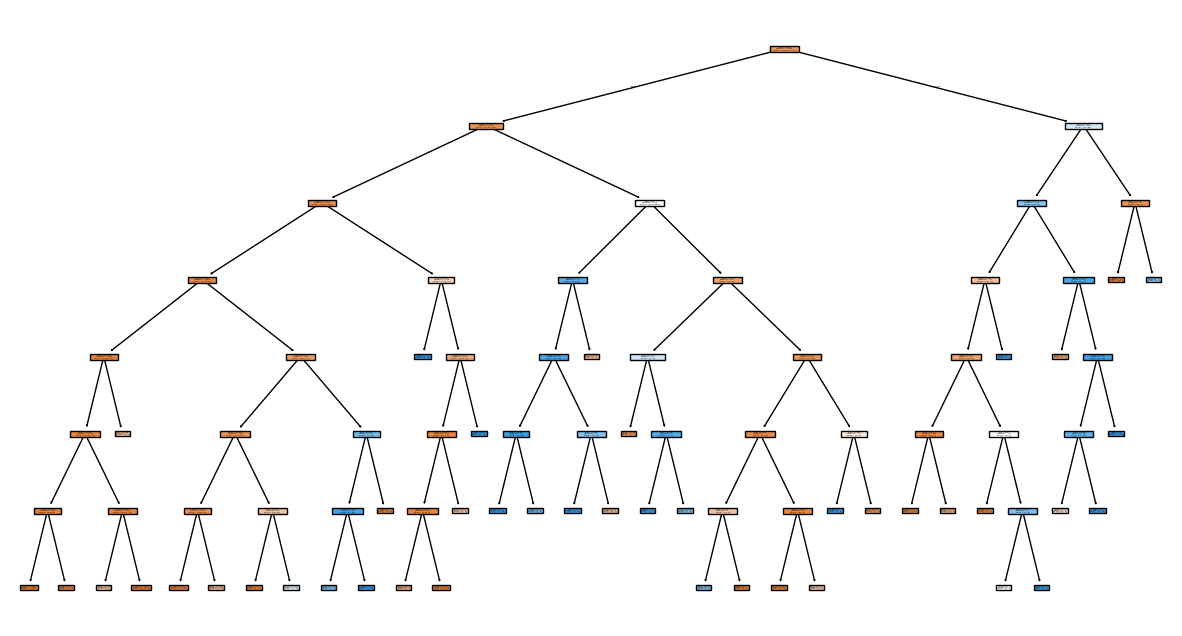

In [55]:
plt.figure(figsize=(15, 8))
plot_tree(model3, feature_names=df.columns[:-1], filled=True)
plt.show()

 *Изучим важность признаков в их влиянии на целевой признак Churn:*

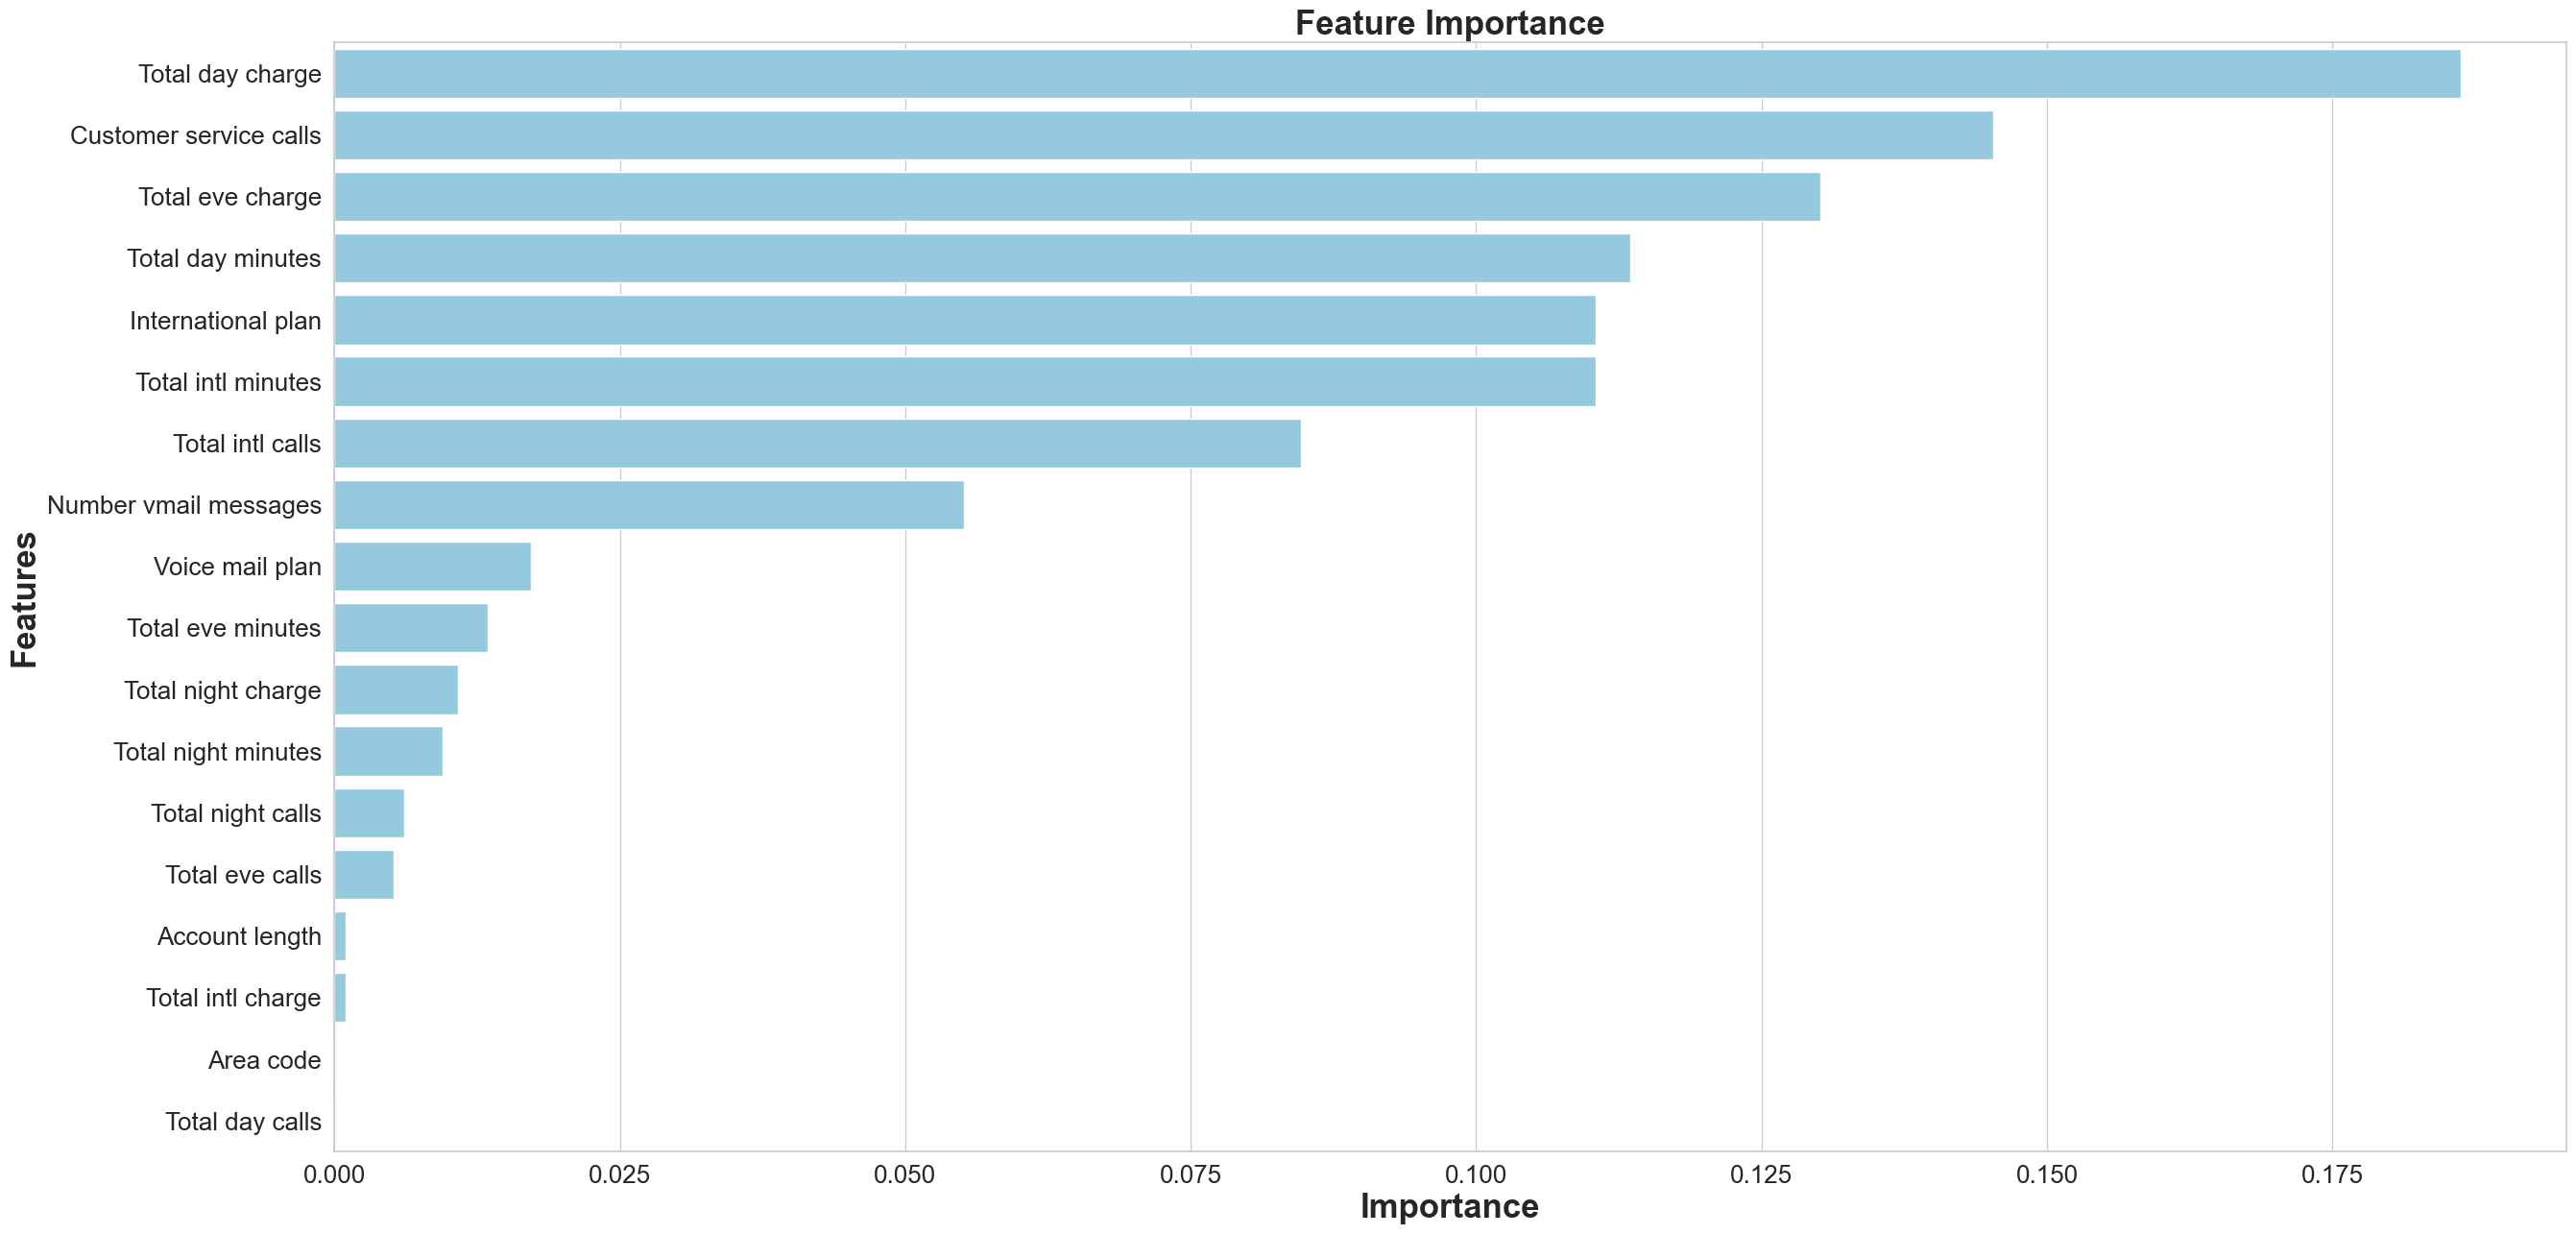

None

,Features,Gini-Importance
0,Total day charge,0.186193
1,Customer service calls,0.145296
2,Total eve charge,0.130112
3,Total day minutes,0.113503
4,International plan,0.110448
5,Total intl minutes,0.110437
6,Total intl calls,0.084684
7,Number vmail messages,0.055163
8,Voice mail plan,0.017180
9,Total eve minutes,0.013426


In [56]:
feats = {}
for feature, importance in zip(df.columns, model3.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

*Часть признаков не оказывают существенного влияния на целевой параметр*

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.


*Возьмем ранее полученные данные после масштабирования (нормализации) X_train_scaled и X_test_scaled и построим модель DecisionTreeClassifier на основе этих данных*

In [57]:
model4 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)
model4.fit(X_train_scaled, y_train)
y_pred4 = model4.predict(X_test_scaled)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       857
           1       0.89      0.71      0.79       143

    accuracy                           0.94      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.94      0.94      0.94      1000



*Видим, что после масштабирования качество модели практически не изменилось,  - параметры Precision и Recall на минорном классе остались на уровнях 89% и 71% соответственно.*

In [58]:
confusion_mat = confusion_matrix(y_test, y_pred4)
print("Точность:", accuracy_score(y_test, y_pred4))
print("Точность:", precision_score(y_test, y_pred4, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred4, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred4, average = 'binary'))

Точность: 0.945
Точность: 0.8859649122807017
Полнота: 0.7062937062937062
F1-мера: 0.7859922178988327


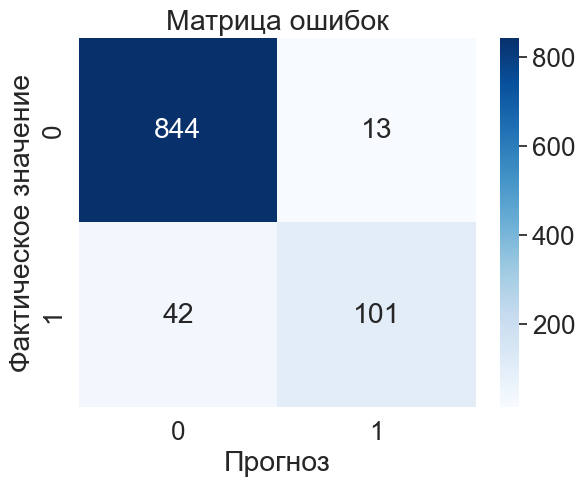

In [59]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Ошибки классификации при масштабировании признаков не изменились ни в одной группе*

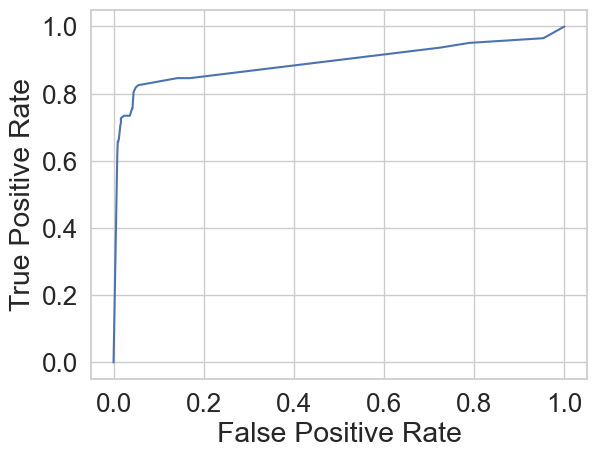

In [60]:
#Предсказываем вероятности
y_pred_proba4 = model4.predict_proba(X_test_scaled)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba4)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
print("AUC: %.3f" % auc)

AUC: 0.892


In [62]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Показатель AUC также почти не изменился (0,907 до масштабирования против 0,902 после)*

-------------------------------------------

*Выясним, нужно ли бороться с дисбалансом классов. Используем стратифицированное разбиение, изменение параметров модели деревьев решений на сбалансированные по классам веса, и посмотрим, что даст наилучший результат.*


*1. Стратифицированное разбиение выборки.*

In [63]:
X2 = df.drop('Churn', axis=1)
y2 = df['Churn']

X_train0, X_test0, y_train0, y_test0 = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)

*2. Изменение параметров модели деревьев решений на сбалансированные по классам веса*

In [64]:
model5 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, class_weight='balanced')
model5.fit(X_train0, y_train0)
y_pred5 = model5.predict(X_test0)
print(classification_report(y_test0, y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       855
           1       0.61      0.79      0.69       145

    accuracy                           0.90      1000
   macro avg       0.79      0.85      0.81      1000
weighted avg       0.91      0.90      0.90      1000



*Показатель Recall поднимается с 71% до 79%, но показатель Precision (сколько из предсказанных переходов на тестовой выборке в реальности были переходами) упал с 89% до 61%*

In [65]:
confusion_mat = confusion_matrix(y_test0, y_pred5)
print("Точность:", accuracy_score(y_test0, y_pred5))
print("Точность:", precision_score(y_test0, y_pred5, average = 'binary'))
print("Полнота:", recall_score(y_test0, y_pred5, average = 'binary'))
print("F1-мера:", f1_score(y_test0, y_pred5, average = 'binary'))
print("AUC:", roc_auc_score(y_test0, y_pred5))

Точность: 0.897
Точность: 0.6117021276595744
Полнота: 0.7931034482758621
F1-мера: 0.6906906906906907
AUC: 0.8538616656583989


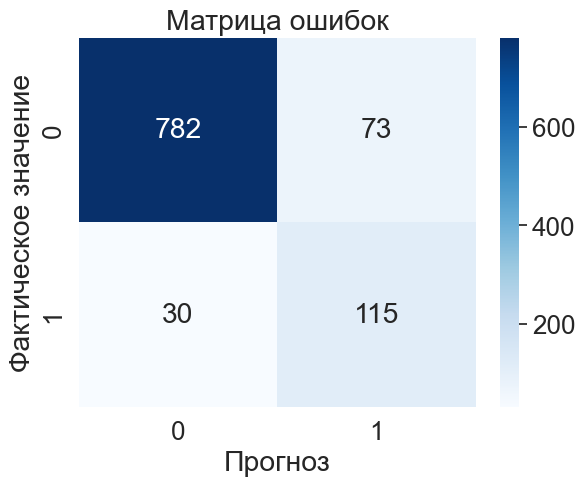

In [66]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Модель стала чаще классифицировать случаи в Churn = 1, когда фактически Churn=0, то есть чаще, чем нужно, прогнозировать переходы. За счет этого увеличилось значение правильно классифицированный реальных переходов, но еще сильнее увеличилось число отрицательных случаев (Churn=0), которые модель ошибочно классифицировала как положительные. (Рост с 13 до 72 случаев).*

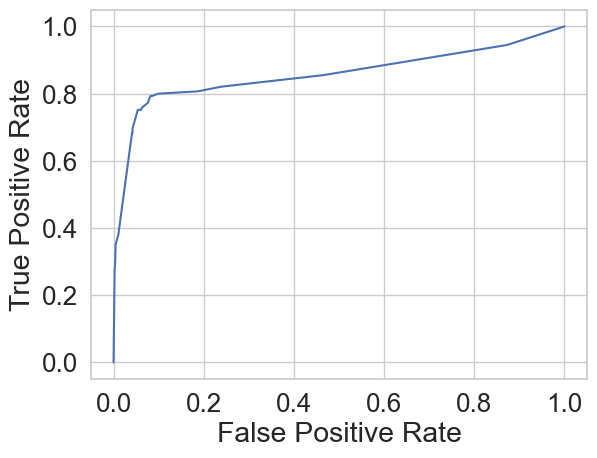

In [67]:
#Предсказываем вероятности
y_pred_proba5 = model5.predict_proba(X_test0)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test0, y_pred_proba5)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
auc = metrics.roc_auc_score(y_test0, y_pred_proba5)
print("AUC: %.3f" % auc)

AUC: 0.857


In [69]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Видим, что в данном случае стандартные методы борьбы с дисбалансом классов не позволили улучшить модель, также как и масштабирование данных.*

Попробуем применить еще одну модель классификаци - RandomForestClassifier, также основанную на "деревьях" решений

In [70]:
from sklearn.ensemble import RandomForestClassifier

model7 = RandomForestClassifier(max_depth=11, min_samples_leaf=3)
model7.fit(X_train_scaled, y_train)
y_pred7 = model7.predict(X_test_scaled)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       857
           1       0.97      0.64      0.77       143

    accuracy                           0.95      1000
   macro avg       0.96      0.82      0.87      1000
weighted avg       0.95      0.95      0.94      1000



Показатель Recall немного снизился с 71% до 67%, но показатель Precision (сколько из предсказанных переходов на тестовой выборке в реальности были переходами) вырос с 89% до 94%

In [71]:
confusion_mat = confusion_matrix(y_test, y_pred7)
print("Точность:", accuracy_score(y_test, y_pred7))
print("Точность:", precision_score(y_test, y_pred7, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred7, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred7, average = 'binary'))

Точность: 0.946
Точность: 0.968421052631579
Полнота: 0.6433566433566433
F1-мера: 0.773109243697479


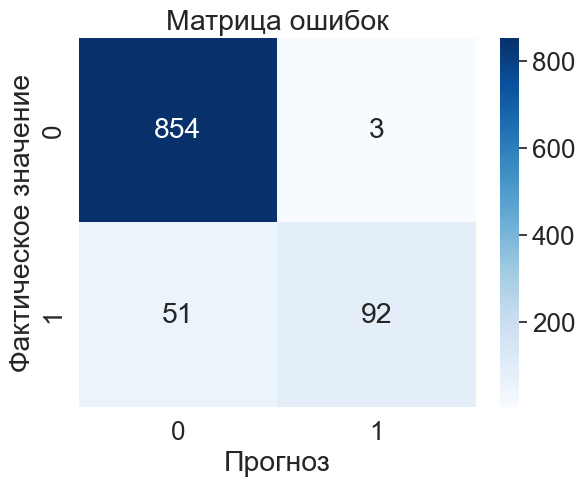

In [72]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

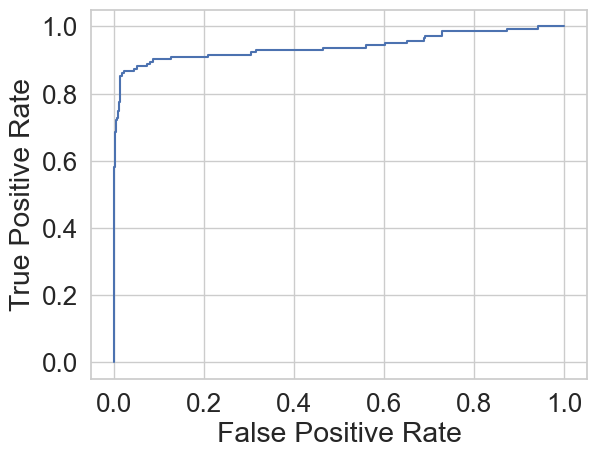

In [73]:
#Предсказываем вероятности
y_pred_proba7 = model7.predict_proba(X_test_scaled)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba7)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
auc = metrics.roc_auc_score(y_test, y_pred_proba7)
print("AUC: %.3f" % auc)

AUC: 0.940


In [75]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Показатель AUC (ROC) удалось поднять таким образом с 90% до 94%*

*В данном исследовании мы увидели, что модель DecisionTree дает хорошие результаты в задаче классификации по сравнению с другими моделями. Масштабирование данных не позволяет улучшить качество модели в этом случае. Также не ухудшает качество модели дисбаланс классов у целевого признака - модель "из коробки" отлично справляется с такими данными и не требует дополнительных манипуляций. Альтернативный вариант модели дерева решений (RandomForestClassifier) позволяет незначительно повысить качество предсказаний модели.*